In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time


mean1 = [-20, 20]
cov1 = [[40, 0], [0, 40]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T

mean2 = [-10, -20]
cov2 = [[40, 0], [0, 40]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T

plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'o')
plt.axis('equal')
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
np.shape(x1)

(200,)

In [4]:
#x1
bias = np.ones(200, dtype=np.int) #Add bias term

pos = np.column_stack([x1,y1,bias])
neg = np.column_stack([x2,y2,bias])

all_patterns = np.concatenate([pos,neg])

In [5]:
targets = np.ones(200,dtype=np.int)
minus = -1 * np.ones(200,dtype=np.int)
targets = np.append(targets,minus)

all_samples = np.column_stack([all_patterns,targets])
np.random.shuffle(all_samples)

In [6]:
patterns = all_samples[:200,:3]
targets = all_samples[:200,3]

test_patterns = all_samples[200:,:3]
test_targets = all_samples[200:,3]
#print(test_patterns)
#print(test_targets)

In [7]:
def initWeights(dim):
    np.random.seed(42)
    w = []
    for i in range(dim):
        w.append(np.random.normal(0,0.01))
    return w
        

In [8]:
#Dimension 2 columns, one for each dimension in input data
#W = 0.01 * np.random.randn(2,2)
W=initWeights(3)
print(W)

[0.004967141530112327, -0.0013826430117118466, 0.006476885381006925]


In [9]:
def test(W,X,y):
    predictions = []
    corr = 0
    for i in range(len(y)):        
        pred = np.dot(W,X[i])
        if pred>0:
            predictions.append(1)
        else:
            predictions.append(-1)
    #print(predictions)
    #print(y)
    
    for i in range(len(predictions)):
        if predictions[i]==y[i]:
            corr+=1 
    acc = corr/len(y)
    return acc

In [10]:
#Prints train and test erorrs during each epoch/iteration
def printLearningCurve(trainErr,testErr,iterations,typ,training,learning="delta rule"):
    #f,axarr = plt.subplots(2,sharex=True)
    plt.plot(range(iterations),trainErr, '-',label="train")
    plt.plot(range(iterations),testErr, '-',label="test")
    title='Accuracy at each '+typ+" using "+training+" training"+" for "+learning+" learning"
    plt.title(title)

    plt.grid()
    plt.legend()
    plt.show()


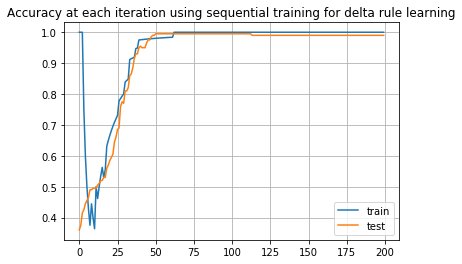

Final test acc is:  0.99


In [11]:
def train_seq(patterns,targets,W,epochs):
    train_acc=[]
    test_acc=[]
    eta = 0.00001

    #Sekventiell
    for i in range(targets.size):
        prediction = np.dot(patterns[i],W) #w*X
        error = prediction-targets[i] #beräkna felet

        delta_w = -eta*np.dot(error,np.transpose(patterns[i])) #uppdatera vikterna
        W = np.add(W,delta_w)
        acc_test = test(W,test_patterns,test_targets)
        acc_train= test(W,patterns[:i+1],targets[:i+1])
        
        train_acc.append(acc_train)
        test_acc.append(acc_test)
        
        #print("For iteration",i,"test acc is:",acc_test)
        #print("For iteration",i,"train acc is:",acc_train)
    
    printLearningCurve(train_acc,test_acc,targets.size,"iteration","sequential")
    print("Final test acc is: ",test_acc[targets.size-1])
    return W

iterations = 10
W_seq = train_seq(patterns,targets,W,iterations)
#print(W_seq)

In [12]:
print(test(W_seq,test_patterns,test_targets)) 

0.99


In [13]:
np.shape(W)

(3,)

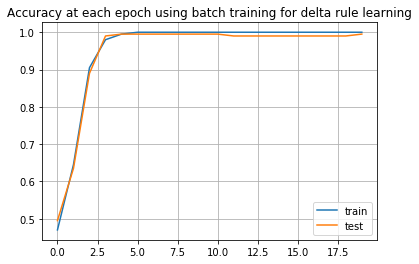

Final test acc is:  0.995
[-0.00202318  0.02626172  0.00653799]
0.995


In [14]:
def train_batch(patterns,targets,W,epoch):
    train_accs=[]
    test_accs=[]
    
    eta = 0.0001
    delta_w=0
    #print(test(W,test_patterns,test_targets))
    for n in range(epoch):
        error=0
        delta_w=0
        for i in range(len(targets)):
            prediction = np.dot(patterns[i],W) 
            error = prediction-targets[i]
            #print(error)
            delta_w += -eta*np.dot(error,np.transpose(patterns[i]))
        #uppdatera vikterna
        delta_w = delta_w/len(targets)
        ##print(delta_w)
        W = np.add(W,delta_w)
        
        acc_test = test(W,test_patterns,test_targets)
        acc_train = test(W,patterns,targets)
        test_accs.append(acc_test)
        train_accs.append(acc_train)
        #print("For epoch",n,"test acc is:",acc_test)
    printLearningCurve(train_accs,test_accs,epoch,"epoch","batch")
    print("Final test acc is: ",test_accs[epoch-1])
    return W

W=initWeights(3)
W_batch = train_batch(patterns,targets,W,20)
print(W_batch)
print(test(W_batch,test_patterns,test_targets)) 

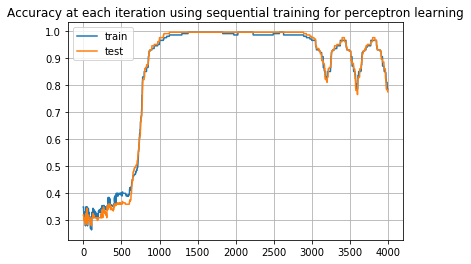

Final test acc is:  0.775
[0.01057527 0.01086261 0.00539063]


In [15]:
def trainPerc_seq(patterns, targets, W, epochs):
    train_accs=[]
    test_accs=[]
    
    eta = 0.00001
    for i in range(epochs):
        counter = 0
        for j in range(len(patterns)):
            prediction = np.dot(patterns[j],W) #w*X
            if not (prediction<0)==(targets[j]<0):
                counter = counter + 1
                error = targets[i]-prediction
                delta_w = eta*np.dot(error,np.transpose(patterns[j]))
                W = np.add(W, delta_w)
                
            acc_test = test(W,test_patterns,test_targets)
            acc_train = test(W,patterns,targets)
            test_accs.append(acc_test)
            train_accs.append(acc_train)
        #print("For epoch",i,"acc is:",acc_test,"Missprediction in training",counter)
    printLearningCurve(train_accs,test_accs,(targets.size*epochs),"iteration","sequential","perceptron")
    print("Final test acc is: ",test_accs[targets.size*epochs-1])
    return W

W=initWeights(3)
W_perc_seq = trainPerc_seq(patterns,targets,W,20)
print(W_perc_seq)

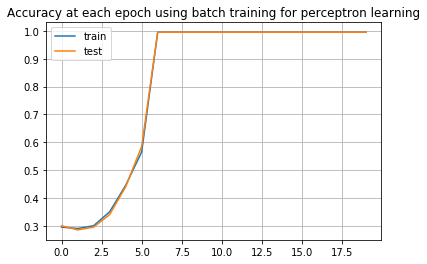

Final test acc is:  0.995
[0.00126642 0.003204   0.00663592]


In [16]:
def trainPerc_batch(patterns, targets, W, epochs):
    train_accs=[]
    test_accs=[]
    
    eta=0.000001
    for i in range(epochs):
        counter = 0
        delta_w = 0
        for j in range(len(patterns)):
            prediction = np.dot(patterns[j],W) #w*X
            if not (prediction<0)==(targets[j]<0):
                counter += 1
                error = targets[i]-prediction
                delta_w += eta*np.dot(error,np.transpose(patterns[j]))
        
        delta_w = delta_w
        W = np.add(W, delta_w)
        acc_test = test(W,test_patterns,test_targets)
        acc_train = test(W,patterns,targets)
        test_accs.append(acc_test)
        train_accs.append(acc_train)
        #print("For epoch",i,"acc is:",acc_test,"Missprediction in training",counter)
    printLearningCurve(train_accs,test_accs,epochs,"epoch","batch","perceptron")
    print("Final test acc is: ",test_accs[epochs-1])
    return W

W=initWeights(3)
W_perc_batch = trainPerc_batch(patterns,targets,W,20)
print(W_perc_batch)